In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## TruthQA

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
mlp_probe_coef = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_ind_mlp_probe_coef.npy')

mlp_probe_coef.shape
mlp_probe_coef = mlp_probe_coef.reshape(2,32,4096)
var = np.empty(mlp_probe_coef.shape[:2])
for fold in [0,1]:
    for layer in range(32):
        var[fold,layer] = np.var(np.absolute(mlp_probe_coef[fold,layer,:]))

# sns.heatmap(var, linewidth=0.5)

mlp_probe_accs = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_ind_mlp_probe_accs.npy')
print(np.corrcoef(mlp_probe_accs[0],var[0])[0,1])
print(np.corrcoef(mlp_probe_accs[1],var[1])[0,1])

for top_perc in [0.1,0.2,0.3,0.4,0.5]:
    topx = int(mlp_probe_coef.shape[2]*top_perc)
    val0_top = np.argsort(np.absolute(mlp_probe_coef[0][11]))[-topx:]
    val1_top = np.argsort(np.absolute(mlp_probe_coef[1][11]))[-topx:]
    print(top_perc,np.sum([1 for idx in val0_top if idx in val1_top])/topx)

print('Single')
mlp_probe_coef = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_single_mlp_probe_coef.npy')
for fold in [0,1]:
    print(np.var(np.absolute(mlp_probe_coef[fold,:])))

for top_perc in [0.1,0.2,0.3,0.4,0.5]:
    topx = int(mlp_probe_coef.shape[1]*top_perc)
    val0_top = np.argsort(np.absolute(mlp_probe_coef[0]))[-topx:]
    val1_top = np.argsort(np.absolute(mlp_probe_coef[1]))[-topx:]
    print(top_perc,np.sum([1 for idx in val0_top if idx in val1_top])/topx)

-0.7526908680345743
-0.5337405914678552
0.1 0.1295843520782396
0.2 0.22344322344322345
0.3 0.31107491856677527
0.4 0.41514041514041516
0.5 0.5048828125
Single
5.5754964906013355e-05
5.777780004742518e-05
0.1 0.1876096742198825
0.2 0.3120469977874418
0.3 0.42132702627094937
0.4 0.5215724422064546
0.5 0.6160125732421875


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ah_probe_coef = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_ind_ah_probe_coef.npy')

ah_probe_coef.shape
ah_probe_coef = ah_probe_coef.reshape(2,32,32,128)
var = np.empty(ah_probe_coef.shape[:3])
for fold in [0,1]:
    for layer in range(32):
        for head in range(32):
            var[fold,layer,head] = np.var(np.absolute(ah_probe_coef[fold,layer,head,:]))

# sns.heatmap(var[0], linewidth=0.5)
# sns.heatmap(var[1], linewidth=0.5)

ah_probe_accs = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_ind_ah_probe_accs.npy')
print(np.corrcoef(ah_probe_accs[0],var[0].reshape(1024))[0,1])
print(np.corrcoef(ah_probe_accs[1],var[1].reshape(1024))[0,1])

for top_perc in [0.1,0.2,0.3,0.4,0.5]:
    topx = int(ah_probe_coef.shape[3]*top_perc)
    val0_top = np.argsort(np.absolute(ah_probe_coef[0][11][2]))[-topx:]
    val1_top = np.argsort(np.absolute(ah_probe_coef[1][11][2]))[-topx:]
    print(top_perc,np.sum([1 for idx in val0_top if idx in val1_top])/topx)

print('Single')
ah_probe_coef = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_single_ah_probe_coef.npy')
for fold in [0,1]:
    print(np.var(np.absolute(ah_probe_coef[fold,:])))

for top_perc in [0.1,0.2,0.3,0.4,0.5]:
    topx = int(ah_probe_coef.shape[1]*top_perc)
    val0_top = np.argsort(np.absolute(ah_probe_coef[0]))[-topx:]
    val1_top = np.argsort(np.absolute(ah_probe_coef[1]))[-topx:]
    print(top_perc,np.sum([1 for idx in val0_top if idx in val1_top])/topx)

0.6201667496423953
0.6928822738167548
0.1 0.3333333333333333
0.2 0.48
0.3 0.5263157894736842
0.4 0.5294117647058824
0.5 0.609375
Single
0.00017219764201497197
0.0001984074077300476
0.1 0.31578545815213244
0.2 0.4142824444953079
0.3 0.49416342412451364
0.4 0.5700770580605783
0.5 0.643463134765625


In [ ]:
import numpy as np
mlp_probe_pred = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_vote_on_ind_mlp_probe_pred.npy',allow_pickle=True)
y_true = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_vote_on_ind_mlp_probe_true.npy',allow_pickle=True)

ind_hard_samples = {}
for fold in [0,1]:
    ind_hard_samples[fold] = []
    for i,sample_pred in enumerate(mlp_probe_pred[fold]):
        # print(np.sum(np.argmax(sample_pred,axis=1)),y_true[fold][i])
        if any(np.argmax(sample_pred,axis=1)==y_true[fold][i])==False:
            ind_hard_samples[fold].append(i)
print(len(ind_hard_samples[0]))
print(len(ind_hard_samples[1]))

print('Single')
mlp_probe_pred = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_single_mlp_probe_pred.npy',allow_pickle=True)
y_true = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_single_mlp_probe_true.npy',allow_pickle=True)
hard_samples = {}
for fold in [0,1]:
    hard_samples[fold] = []
    for i,sample_pred in enumerate(mlp_probe_pred[fold]):
        if np.argmax(sample_pred)!=y_true[fold][i]:
            hard_samples[fold].append(i)
print(len(hard_samples[0]), sum([1 for sample in hard_samples[0] if sample in ind_hard_samples[0]]))
print(len(hard_samples[1]), sum([1 for sample in hard_samples[1] if sample in ind_hard_samples[1]]))

1
3
Single
98 1
144 3


In [ ]:
import numpy as np
ah_probe_pred = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_vote_on_ind_ah_probe_pred.npy',allow_pickle=True)
y_true = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_vote_on_ind_ah_probe_true.npy',allow_pickle=True)

print(sum(y_true[0]), sum(y_true[1]))

ind_hard_samples = {}
for fold in [0,1]:
    ind_hard_samples[fold] = []
    for i,sample_pred in enumerate(ah_probe_pred[fold]):
        # print(np.sum(np.argmax(sample_pred,axis=1)),y_true[fold][i])
        if any(np.argmax(sample_pred,axis=1)==y_true[fold][i])==False:
            ind_hard_samples[fold].append(i)
print(len(ind_hard_samples[0]))
print(len(ind_hard_samples[1]))

print('Single')
ah_probe_pred = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_single_ah_probe_pred.npy',allow_pickle=True)
y_true = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_single_ah_probe_true.npy',allow_pickle=True)
hard_samples = {}
for fold in [0,1]:
    hard_samples[fold] = []
    for i,sample_pred in enumerate(ah_probe_pred[fold]):
        if np.argmax(sample_pred)!=y_true[fold][i]:
            hard_samples[fold].append(i)
print(len(hard_samples[0]), sum([1 for sample in hard_samples[0] if sample in ind_hard_samples[0]]))
print(len(hard_samples[1]), sum([1 for sample in hard_samples[1] if sample in ind_hard_samples[1]]))

236 273
0
0
Single
85 0
98 0


In [ ]:
import numpy as np
mlp_probe_accs = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_vote_on_ind_mlp_probe_accs.npy')
print('MLP probe acc (vote over individual): ',mlp_probe_accs)
# mlp_probe_accs = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_lr_on_ind_mlp_probe_accs.npy')
# print('MLP probe acc (additional layer over individual): ',np.mean(mlp_probe_accs))

print('\n')
ah_probe_accs = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_vote_on_ind_ah_probe_accs.npy')
print('AH probe acc (vote over individual): ',ah_probe_accs)
# ah_probe_accs = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_lr_on_ind_ah_probe_accs.npy')
# print('AH probe acc (additional layer over individual): ',np.mean(ah_probe_accs))

MLP probe acc (vote over individual):  [0.63286713 0.59766277]


AH probe acc (vote over individual):  [0.58741259 0.5442404 ]


In [ ]:
x = [i for i in range(2,10)]
x

[2, 3, 4, 5, 6, 7, 8, 9]

0.8269230769230769 Layer: 31
2 0.6101398601398601
3 0.6363636363636364
4 0.6398601398601399
5 0.6433566433566433
6 0.6381118881118881
7 0.6381118881118881
8 0.6381118881118881
9 0.6381118881118881
0.7712854757929883 Layer: 31
2 0.5726210350584308
3 0.5943238731218697
4 0.5943238731218697
5 0.5959933222036727
6 0.5993322203672788
7 0.5976627712854758
8 0.5959933222036727
9 0.5976627712854758
AH
0.7604895104895105 593 Layer: 18.0 Head: 16
0.7512520868113522 670 Layer: 20.0 Head: 29
2 0.7097902097902098
5 0.6835664335664335
10 0.6013986013986014
20 0.5874125874125874
50 0.5874125874125874
100 0.5874125874125874
200 0.5874125874125874
300 0.5874125874125874
2 0.6928213689482471
5 0.6227045075125208
10 0.5893155258764607
20 0.5542570951585977
50 0.5442404006677797
100 0.5442404006677797
200 0.5442404006677797
300 0.5442404006677797


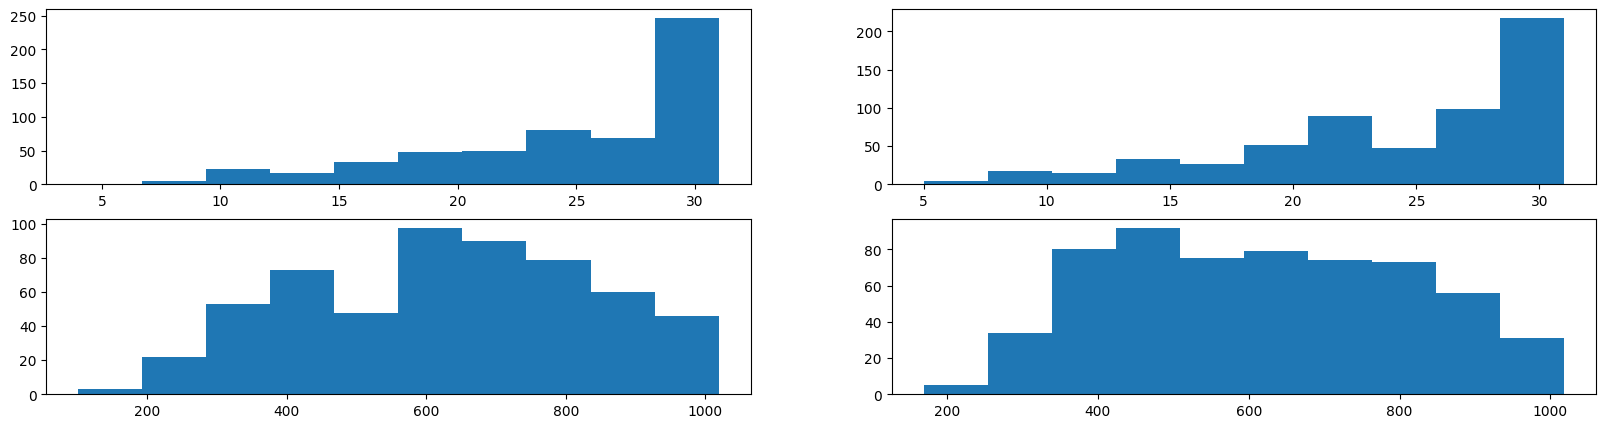

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from collections import Counter
mlp_probe_pred = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_vote_on_ind_mlp_probe_pred.npy',allow_pickle=True)
y_true = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_vote_on_ind_mlp_probe_true.npy',allow_pickle=True)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 5))
confident_probe, confident_sample_pred = {}, {}
for fold in [0,1]:
    confident_probe[fold], confident_sample_pred[fold] = [], []
    for i,sample_pred in enumerate(mlp_probe_pred[fold]):
        probe_wise_entropy = (-sample_pred*np.log2(sample_pred)).sum(axis=1)
        confident_probe[fold].append(np.argmin(probe_wise_entropy))
        confident_sample_pred[fold].append(np.argmax(sample_pred[np.argmin(probe_wise_entropy)]))
    print(np.sum(y_true[fold]==confident_sample_pred[fold])/len(y_true[fold]), 'Layer:', statistics.mode(confident_probe[fold]))
    axes[0,fold].hist(confident_probe[fold])
    for top_num in range(2,10):
      confident_sample_pred[fold] = []
      for i,sample_pred in enumerate(mlp_probe_pred[fold]):
          probe_wise_entropy = (-sample_pred*np.log2(sample_pred)).sum(axis=1)
          top_probes = sorted(range(len(probe_wise_entropy)), key=lambda i: probe_wise_entropy[i])[-top_num:]
          confident_sample_pred[fold].append(np.mean([np.argmax(sample_pred[probe,:]) for probe in top_probes]).astype(int))
      print(top_num,np.sum(y_true[fold]==confident_sample_pred[fold])/len(y_true[fold]))
# for fold in [0,1]:
#     for top_num in range(2,10):
#         top_probes = list(dict(Counter(confident_probe[fold]).most_common(top_num)))
#         preds = np.vstack([np.argmax(mlp_probe_pred[fold][:,probe,:], axis=1) for probe in top_probes])
#         preds = np.mean(preds, axis=0).astype(int) # Vote over top probes
#         print(top_num, np.sum(preds==y_true[fold])/len(y_true[fold]))


print('AH')
ah_probe_pred = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_vote_on_ind_ah_probe_pred.npy',allow_pickle=True)
y_true = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_vote_on_ind_ah_probe_true.npy',allow_pickle=True)
confident_probe, confident_sample_pred = {}, {}
for fold in [0,1]:
    confident_probe[fold], confident_sample_pred[fold] = [], []
    for i,sample_pred in enumerate(ah_probe_pred[fold]):
        probe_wise_entropy = (-sample_pred*np.log2(sample_pred)).sum(axis=1)
        confident_probe[fold].append(np.argmin(probe_wise_entropy))
        confident_sample_pred[fold].append(np.argmax(sample_pred[np.argmin(probe_wise_entropy)]))
    best_probe = statistics.mode(confident_probe[fold])
    print(np.sum(y_true[fold]==confident_sample_pred[fold])/len(y_true[fold]), best_probe,'Layer:', np.floor(best_probe/32), 'Head:', best_probe%32-1)
    axes[1,fold].hist(confident_probe[fold])
    # for top_num in [2,5,10,20,50,100,200,300]:
    #   confident_sample_pred[fold] = []
    #   for i,sample_pred in enumerate(ah_probe_pred[fold]):
    #       probe_wise_entropy = (-sample_pred*np.log2(sample_pred)).sum(axis=1)
    #       top_probes = sorted(range(len(probe_wise_entropy)), key=lambda i: probe_wise_entropy[i])[-top_num:]
    #       confident_sample_pred[fold].append(np.mean([np.argmax(sample_pred[probe,:]) for probe in top_probes]).astype(int))
    #   print(top_num,np.sum(y_true[fold]==confident_sample_pred[fold])/len(y_true[fold]))
for fold in [0,1]:
    for top_num in [2,5,10,20,50,100,200,300]:
        top_probes = list(dict(Counter(confident_probe[fold]).most_common(top_num)))
        preds = np.vstack([np.argmax(ah_probe_pred[fold][:,probe,:], axis=1) for probe in top_probes])
        preds = np.mean(preds, axis=0).astype(int) # Vote over top probes
        print(top_num, np.sum(preds==y_true[fold])/len(y_true[fold]))

In [ ]:
mlp_probe_accs = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_ind_mlp_probe_accs.npy')
for fold in [0,1]:
    print(mlp_probe_accs[fold][31])
ah_probe_accs = np.load('/content/gdrive/MyDrive/honest_llama/probes/llama_7B_tqa_gen_2_ind_ah_probe_accs.npy')
print(ah_probe_accs[0][593])
print(ah_probe_accs[0][670])

0.7832167832167832
0.7045075125208681
0.7552447552447552
0.7674825174825175


In [ ]:
from datasets import load_dataset
dataset = load_dataset("truthful_qa", "generation", streaming= True)['validation']
len_dataset = 817
# dataset = load_dataset("OamPatel/iti_nq_open_val", streaming= True)['validation']
# len_dataset = 3610
actual_labels= []
for val in list(dataset.take(len_dataset)):
    actual_labels.append([1 for ans in val['correct_answers']]+[0 for ans in val['incorrect_answers']])
    # actual_labels.append([1 for ans in val['answer']]+[0])
idxs_to_split_at = np.cumsum([len(x) for x in actual_labels])

import numpy as np
np.random.seed(42)
labels = np.load(f"/content/gdrive/MyDrive/honest_llama/features/llama_7B_tqa_gen_labels_6000.npy")
labels = list(labels)
separated_labels = []
for i in range(len(idxs_to_split_at)):
    if i == 0:
        separated_labels.append(labels[:idxs_to_split_at[i]])
    else:
        separated_labels.append(labels[idxs_to_split_at[i-1]:idxs_to_split_at[i]])
assert separated_labels == actual_labels

fold_idxs = np.array_split(np.arange(len_dataset), 2)
for i in range(2):
    train_idxs = np.concatenate([fold_idxs[j] for j in range(2) if j != i])
    train_set_idxs = np.random.choice(train_idxs, size=int(len(train_idxs)*(1-0.2)), replace=False)
    val_set_idxs = np.array([x for x in train_idxs if x not in train_set_idxs])
    print(sum(np.concatenate([separated_labels[i] for i in train_set_idxs],axis=0)),len(train_set_idxs),sum(np.concatenate([separated_labels[i] for i in val_set_idxs],axis=0)),len(val_set_idxs))
    tot = len(np.concatenate([separated_labels[i] for i in val_set_idxs],axis=0))
    print('baseline accuracy:',max(sum(np.concatenate([separated_labels[i] for i in val_set_idxs],axis=0))
                                  ,tot-sum(np.concatenate([separated_labels[i] for i in val_set_idxs],axis=0))
                                  )/tot)

936 326 236 82
baseline accuracy: 0.5874125874125874
1155 327 273 82
baseline accuracy: 0.5442404006677797


In [ ]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [ ]:
import numpy as np

dataset_name = 'tqa_gen'
file_ends = [1000,3000,4000,5000,6000] # tqa
# file_ends = [1000,3000,5000,7000,9000,11000] # nq
mlp_wise_activations = []
for file_end in file_ends:
    mlp_wise_activations.append(np.load(f"/content/gdrive/MyDrive/honest_llama/features/llama_7B_tqa_gen_mlp_wise_{file_end}.npy"))
mlp_wise_activations = np.concatenate(mlp_wise_activations, axis=0)
assert mlp_wise_activations.shape[1:] == (32, 4096)
labels = np.load(f"/content/gdrive/MyDrive/honest_llama/features/llama_7B_tqa_gen_labels_{file_end}.npy")
assert len(labels)==len(mlp_wise_activations)

# separated_mlp_wise_activations, separated_labels, idxs_to_split_at = get_separated_activations(labels, mlp_wise_activations, dataset_name)
mlp_wise_activations.shape

(5918, 32, 4096)

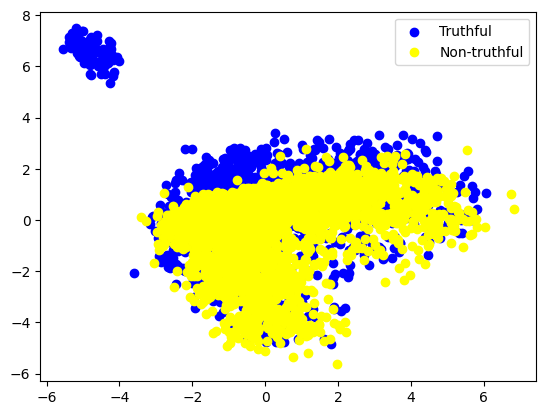

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

for layer in [11]: # range(32):
    layer_mlp_wise_activations = np.squeeze(mlp_wise_activations[:,layer,:])
    # # layer_mlp_wise_activations = (layer_mlp_wise_activations - layer_mlp_wise_activations.min())/(layer_mlp_wise_activations.max() - layer_mlp_wise_activations.min()) # is it okay to normalise across all dimensions?
    # truth_activations = np.vstack([layer_mlp_wise_activations[i,:] for i,label in enumerate(labels) if label==1])
    # false_activations = np.vstack([layer_mlp_wise_activations[i,:] for i,label in enumerate(labels) if label==0])
    # # print(layer,np.var(truth_activations),np.var(false_activations))
    # print(layer,angle_between(np.mean(truth_activations,axis=0),np.mean(false_activations,axis=0)))
    pca = PCA(n_components=2)
    transformed = pd.DataFrame(pca.fit_transform(layer_mlp_wise_activations))
    plt.scatter(transformed[labels==1][0], transformed[labels==1][1], label='Truthful', c='blue')
    plt.scatter(transformed[labels==0][0], transformed[labels==0][1], label='Non-truthful', c='yellow')
    # break
plt.legend()
plt.show()

In [ ]:
import numpy as np

dataset_name = 'tqa_gen'
file_ends = [1000,3000,4000,5000,6000] # tqa
# file_ends = [1000,3000,5000,7000,9000,11000] # nq
head_wise_activations = []
for file_end in file_ends:
    head_wise_activations.append(np.load(f"/content/gdrive/MyDrive/honest_llama/features/llama_7B_tqa_gen_head_wise_{file_end}.npy"))
head_wise_activations = np.concatenate(head_wise_activations, axis=0)
assert head_wise_activations.shape[1:] == (32, 4096)
labels = np.load(f"/content/gdrive/MyDrive/honest_llama/features/llama_7B_tqa_gen_labels_{file_end}.npy")
assert len(labels)==len(head_wise_activations)

head_wise_activations = head_wise_activations.reshape(head_wise_activations.shape[0],32,32,128)
head_wise_activations.shape

(5918, 32, 32, 128)

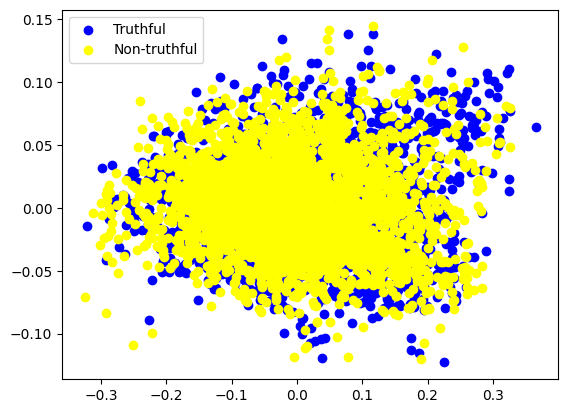

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

for layer,head in [(0,0),(11,2)]: # range(32):
    layer_head_wise_activations = np.squeeze(head_wise_activations[:,layer,head,:])
    pca = PCA(n_components=2)
    transformed = pd.DataFrame(pca.fit_transform(layer_head_wise_activations))
    plt.scatter(transformed[labels==1][0], transformed[labels==1][1], label='Truthful', c='blue')
    plt.scatter(transformed[labels==0][0], transformed[labels==0][1], label='Non-truthful', c='yellow')
    break
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

for layer,head in [(0,0),(11,2)]: # range(32):
    layer_head_wise_activations = np.squeeze(head_wise_activations[:,layer,head,:])
    truth_activations = np.vstack([layer_head_wise_activations[i,:] for i,label in enumerate(labels) if label==1])
    false_activations = np.vstack([layer_head_wise_activations[i,:] for i,label in enumerate(labels) if label==0])
    print(layer,head,angle_between(np.mean(truth_activations,axis=0),np.mean(false_activations,axis=0)))

0 0 0.08841714521444943
11 2 0.2028708625704832


## NQ Open (Model Gen)

In [2]:
import torch.nn as nn
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim)

        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function (readout)
        # self.fc3 = nn.Linear(hidden_dim, output_dim)

        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 128)
        self.fc3 = nn.Linear(128, 64)
        # self.fc4 = nn.Linear(64,2)
        self.fc4 = nn.Linear(64,1)

    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)

        # # Non-linearity  # NON-LINEAR
        # out = self.sigmoid(out)
        # # Linear function (readout)  # LINEAR
        # out = self.fc2(out)

        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        # out = self.sigmoid(out)

        return out

In [3]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00


In [22]:
from tqdm.notebook import tqdm
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler
import json
from matplotlib import pyplot as plt
import statistics
from datasets import Dataset

labels = []
with open("/content/gdrive/MyDrive/honest_llama/responses/llama_7B_nq_open_greedy_responses_labels_1800.json", 'r') as read_file:
    for line in read_file:
        data = json.loads(line)
        labels.append(1 if data['rouge1_to_target']>0.3 else 0)
# labels = labels[:540]
np.sum(labels)

318

In [45]:
num_layers = 32
mlp_dims = 11008

token_idxes = np.load(f"/content/gdrive/MyDrive/honest_llama/responses/llama_7B_nq_open_greedy_responses_1800_response_start_token_idx.npy")

# file_ends = [(a*20)+20 for a in range(int(540/20))] + [(a*10)+10 for a in range(int(860/10)) if (a*10)+10>540] + [(a*5)+5 for a in range(int(1800/5)) if (a*5)+5>860] # mlp final
# file_lens = [20 for a in range(int(540/20))] + [10 for a in range(int(860/10)) if (a*10)+10>540] + [5 for a in range(int(1800/5)) if (a*5)+5>860]
file_ends = [(a*20)+20 for a in range(int(1800/20))] # mlp intermediate
file_lens = [20 for a in range(int(1800/20))]
mlp_wise_activations = []
for file_end,len_file in zip(file_ends,file_lens):
    # acts = np.load(f"/content/gdrive/MyDrive/honest_llama/features//llama_7B_nq_open_all/llama_7B_nq_open_all_mlp_wise_{file_end}.pkl",allow_pickle=True) # mlp final
    acts = np.load(f"/content/gdrive/MyDrive/honest_llama/features//llama_7B_nq_open_all/llama_7B_nq_open_all_mlp_l1_{file_end}.pkl",allow_pickle=True) # mlp intermediate
    # mlp_wise_activations.append(np.stack([act[:,-1,:] for act in acts], axis=0)) # only last token
    # mlp_wise_activations.append(np.stack([act[:,0,:] for act in acts], axis=0)) # only first token
    # mlp_wise_activations.append(np.stack([act[:,token_idxes[file_end-len_file+i]-1,:] for i,act in enumerate(acts)], axis=0)) # last token of prompt
    # mlp_wise_activations.append(np.stack([np.mean(act,axis=1) for act in acts], axis=0)) # avg across all tokens
    mlp_wise_activations.append(np.stack([np.max(act,axis=1) for act in acts], axis=0)) # max across all tokens
    # mlp_wise_activations += acts # all tokens
mlp_wise_activations = np.concatenate(mlp_wise_activations, axis=0)
assert mlp_wise_activations.shape[1:] == (32, mlp_dims)
assert len(labels)==len(mlp_wise_activations)

In [ ]:
mlp_wise_activations.shape

(1800, 32, 11008)

In [ ]:
num_layers = 32
num_heads = 32
ah_dims = 128

token_idxes = np.load(f"/content/gdrive/MyDrive/honest_llama/responses/llama_7B_nq_open_greedy_responses_1800_response_start_token_idx.npy")

file_ends = [(a*20)+20 for a in range(int(540/20))] + [(a*10)+10 for a in range(int(860/10)) if (a*10)+10>540] + [(a*5)+5 for a in range(int(1800/5)) if (a*5)+5>860]
ah_wise_activations = []
for file_end in file_ends:
    acts = np.load(f"/content/gdrive/MyDrive/honest_llama/features/llama_7B_nq_open_all/llama_7B_nq_open_all_head_wise_{file_end}.pkl",allow_pickle=True)
    # ah_wise_activations.append(np.stack([act[:,-1,:] for act in acts], axis=0)) # only last token
    # ah_wise_activations.append(np.stack([act[:,0,:] for act in acts], axis=0)) # only first token
    ah_wise_activations.append(np.stack([act[:,token_idxes[file_end-20+i]-1,:] for i,act in enumerate(acts)], axis=0)) # last token of prompt
    # ah_wise_activations.append(np.stack([np.mean(act,axis=1) for act in acts], axis=0)) # avg across all tokens
    # ah_wise_activations.append(np.stack([np.max(act,axis=1) for act in acts], axis=0)) # max across all tokens
ah_wise_activations = np.concatenate(ah_wise_activations, axis=0)
assert ah_wise_activations.shape[1:] == (32, 4096)
assert len(labels)==len(ah_wise_activations)
ah_wise_activations = np.reshape(ah_wise_activations,(ah_wise_activations.shape[0],num_layers,num_heads,ah_dims))

In [53]:
import numpy as np
np.random.seed(42)
num_folds = 1
using_act = 'mlp'
using_all_tkns = False
non_linear = True
using_chosen_dims = False

# Individual probes
len_dataset = len(mlp_wise_activations) if using_act == 'mlp' else len(ah_wise_activations)

all_val_accs = {}
all_val_f1s = {}
all_test_accs = {}
all_test_f1s = {}
all_test_preds = {}
y_true_test = {}
fold_idxs = np.array_split(np.arange(len_dataset), num_folds) # When using 2-fold CV
train_idxs = np.random.choice(np.arange(len_dataset), size=int(len(labels)*(1-0.2)), replace=False) # When using all data
test_idxs = np.array([x for x in np.arange(len_dataset) if x not in train_idxs]) # When using all data
for i in range(num_folds):
    train_idxs = np.concatenate([fold_idxs[j] for j in range(num_folds) if j != i]) if num_folds>1 else train_idxs
    test_idxs = fold_idxs[i] if num_folds>1 else test_idxs
    train_set_idxs = np.random.choice(train_idxs, size=int(len(train_idxs)*(1-0.2)), replace=False)
    val_set_idxs = np.array([x for x in train_idxs if x not in train_set_idxs])

    tot = len(test_idxs)
    print('baseline accuracy:',max(sum([labels[i] for i in test_idxs])
                                  ,tot-sum([labels[i] for i in test_idxs])
                                  )/tot)
    print('baseline f1:',f1_score([labels[i] for i in test_idxs],[1 for i in test_idxs]))

    if using_act == 'mlp':
        all_X_train = np.stack([mlp_wise_activations[i] for i in train_set_idxs], axis = 0) if not using_all_tkns else [mlp_wise_activations[i] for i in train_set_idxs]
        all_X_val = np.stack([mlp_wise_activations[i] for i in val_set_idxs], axis = 0) if not using_all_tkns else [mlp_wise_activations[i] for i in val_set_idxs]
        all_X_test = np.stack([mlp_wise_activations[i] for i in test_idxs], axis = 0) if not using_all_tkns else [mlp_wise_activations[i] for i in test_idxs]
    else:
        all_X_train = np.stack([ah_wise_activations[i] for i in train_set_idxs], axis = 0)
        all_X_val = np.stack([ah_wise_activations[i] for i in val_set_idxs], axis = 0)
        all_X_test = np.stack([ah_wise_activations[i] for i in test_idxs], axis = 0)
    y_train = np.stack([labels[i] for i in train_set_idxs], axis = 0)
    y_val = np.stack([labels[i] for i in val_set_idxs], axis = 0)
    y_test = np.stack([labels[i] for i in test_idxs], axis = 0)
    y_true_test[i] = y_test
    if non_linear:
        # y_train = np.vstack([np.array([0,1]) if val==1 else (1,0) for val in y_train], dtype='float32')
        # y_val = np.vstack([np.array([0,1]) if val==1 else (1,0) for val in y_val], dtype='float32')
        # y_test = np.vstack([np.array([0,1]) if val==1 else (1,0) for val in y_test], dtype='float32')
        y_train = np.vstack([[val] for val in y_train], dtype='float32')
        y_val = np.vstack([[val] for val in y_val], dtype='float32')
        y_test = np.vstack([[val] for val in y_test], dtype='float32')

    all_val_accs[i] = []
    all_val_f1s[i] = []
    all_test_accs[i] = []
    all_test_f1s[i] = []
    all_test_preds[i] = []
    loop_layers = list(chosen_dims.keys()) if using_chosen_dims else range(num_layers)
    for layer in tqdm(loop_layers):
      loop_heads = range(num_heads) if using_act == 'ah' else [0]
      for head in loop_heads:
        if using_act == 'mlp':
            if using_all_tkns:
                X_train = np.concatenate([np.squeeze(act[layer,:,:]) for act in all_X_train],axis=0)
                y_train_tkns = np.concatenate([[val for j in range(all_X_train[i].shape[1])] for i,val in enumerate(y_train)],axis=0)
            else:
                X_train = np.squeeze(np.take(np.squeeze(all_X_train[:,layer,:]), chosen_dims[layer], axis=1)) if using_chosen_dims else all_X_train[:,layer,:]
                X_val = np.squeeze(np.take(np.squeeze(all_X_val[:,layer,:]), chosen_dims[layer], axis=1)) if using_chosen_dims else all_X_val[:,layer,:]
                X_test = np.squeeze(np.take(np.squeeze(all_X_test[:,layer,:]), chosen_dims[layer], axis=1)) if using_chosen_dims else all_X_test[:,layer,:]
        else:
            X_train = all_X_train[:,layer,head,:]
            X_val = all_X_val[:,layer,head,:]
            X_test = all_X_test[:,layer,head,:]

        if not non_linear:
            wgt_0 = np.sum(y_train)/len(y_train) if not using_all_tkns else np.sum(y_train_tkns)/len(y_train_tkns) # class 0 should get low wgt since number of 1s is very low
            lr = LogisticRegression(random_state=42, max_iter=1000, class_weight={0:wgt_0,1:1-wgt_0})
            clf = lr.fit(X_train, y_train) if not using_all_tkns else lr.fit(X_train, y_train_tkns)
            y_val_pred = clf.predict(X_val) if not using_all_tkns else [np.argmax(np.max(clf.predict_proba(np.squeeze(act[layer,:,:])),axis=0)) for act in all_X_val]
            all_val_accs[i].append(accuracy_score(y_val, y_val_pred))
            all_val_f1s[i].append(f1_score(y_val, y_val_pred))
            y_test_pred = clf.predict(X_test) if not using_all_tkns else [np.argmax(np.max(clf.predict_proba(np.squeeze(act[layer,:,:])),axis=0)) for act in all_X_test]
            all_test_accs[i].append(accuracy_score(y_test, y_test_pred))
            all_test_f1s[i].append(f1_score(y_test, y_test_pred))
            all_test_preds[i].append(clf.predict_proba(X_test)) if not using_all_tkns else [np.max(clf.predict_proba(np.squeeze(act[layer,:,:])),axis=0) for act in all_X_test]
        else:
            train_target = np.stack([labels[i] for i in train_set_idxs], axis = 0)
            class_sample_count = np.array([len(np.where(train_target == t)[0]) for t in np.unique(train_target)])
            weight = 1. / class_sample_count
            samples_weight = torch.from_numpy(np.array([weight[t] for t in train_target])).double()
            sampler = WeightedRandomSampler(samples_weight, len(samples_weight))
            ds_train = Dataset.from_dict({"inputs": X_train, "labels": y_train}).with_format("torch")
            ds_train = DataLoader(ds_train, batch_size=4,sampler=sampler)
            ds_val = Dataset.from_dict({"inputs": X_val, "labels": y_val}).with_format("torch")
            ds_val = DataLoader(ds_val, batch_size=4)
            ds_test = Dataset.from_dict({"inputs": X_test, "labels": y_test}).with_format("torch")
            ds_test = DataLoader(ds_test, batch_size=4)

            input_dim = mlp_dims if using_act=='mlp' else ah_dims # len(chosen_dims[layer]) # 4096
            hidden_dim = 256
            output_dim = 1

            model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
            criterion = nn.BCEWithLogitsLoss(pos_weight = torch.tensor(np.sum(y_train)/(len(y_train)-np.sum(y_train)))) # nn.BCELoss() # nn.CrossEntropyLoss()
            lr = 0.05
            iter_bar = tqdm(ds_train, desc='Train Iter (loss=X.XXX)')

            for epoch in range(10):
              model.train()
              optimizer = torch.optim.SGD(model.parameters(), lr=lr)
              for step,batch in enumerate(iter_bar):
                  optimizer.zero_grad()
                  outputs = model(batch['inputs'])
                  loss = criterion(outputs, batch['labels'])
                  iter_bar.set_description('Train Iter (loss=%5.3f)' % loss.item())
                  loss.backward()
                  optimizer.step()
              lr = lr*0.9
            pred_correct = 0
            y_val_pred = []
            with torch.no_grad():
              model.eval()
              for step,batch in enumerate(ds_val):
                  outputs = model(batch['inputs'])
                  predicted = [1 if pred[0]>0.5 else 0 for pred in nn.Sigmoid()(outputs.data).tolist()]
                  actual = np.squeeze(batch['labels']).tolist()
                  pred_correct += sum([1 if p==a else 0 for p,a in zip(predicted, actual)])
                  y_val_pred += predicted
            # print('Validation Acc:',pred_correct/len(X_val))
            all_val_accs[i].append(pred_correct/len(X_val))
            all_val_f1s[i].append(f1_score([labels[i] for i in val_set_idxs],y_val_pred))
            pred_correct = 0
            y_test_pred = []
            with torch.no_grad():
              model.eval()
              for step,batch in enumerate(ds_test):
                  outputs = model(batch['inputs'])
                  predicted = [1 if pred[0]>0.5 else 0 for pred in nn.Sigmoid()(outputs.data).tolist()]
                  actual = np.squeeze(batch['labels']).tolist()
                  pred_correct += sum([1 if p==a else 0 for p,a in zip(predicted, actual)])
                  y_test_pred += predicted
            # print('Validation Acc:',pred_correct/len(X_test))
            all_test_accs[i].append(pred_correct/len(X_test))
            all_test_f1s[i].append(f1_score([labels[i] for i in test_idxs],y_test_pred))

baseline accuracy: 0.825
baseline f1: 0.2978723404255319


  0%|          | 0/32 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

Train Iter (loss=X.XXX):   0%|          | 0/288 [00:00<?, ?it/s]

In [54]:
for fold in range(num_folds):
    print('Avg:',np.mean(all_test_accs[fold]),np.mean(all_test_f1s[fold]))
    best, best_f1 = np.argmax(all_val_accs[fold]), np.argmax(all_val_f1s[fold])
    print('Best:',all_test_accs[fold][best],'Layer:',best, all_test_f1s[fold][best_f1],'Layer:',best_f1)

Avg: 0.8335069444444445 0.35784270589641964
Best: 0.85 Layer: 10 0.593103448275862 Layer: 12


0.8583333333333333 Layer: 18 0.592


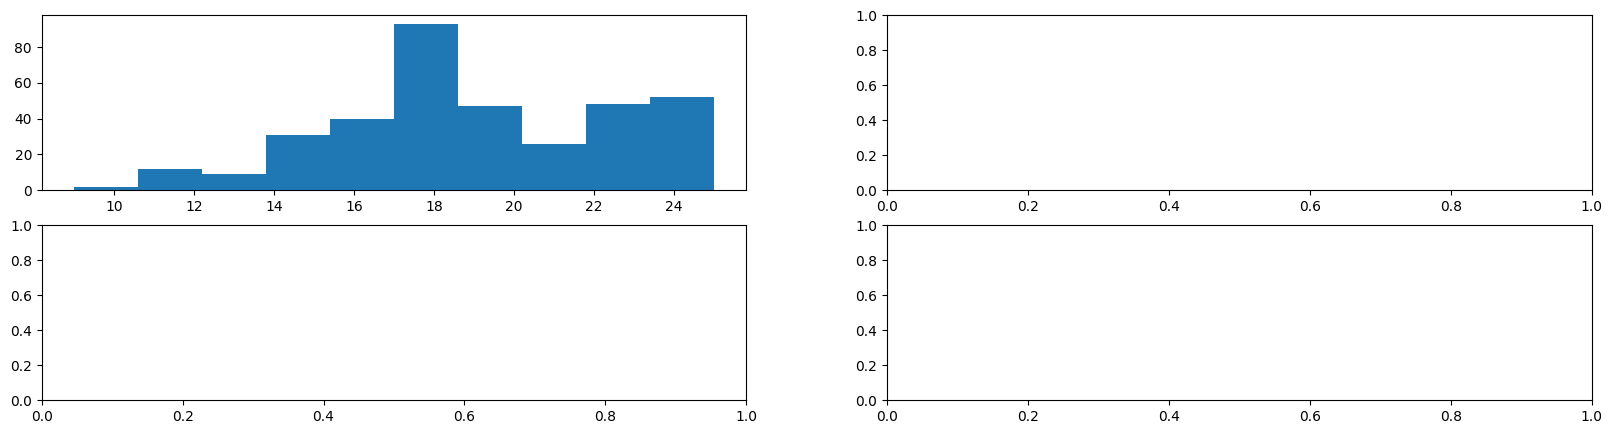

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 5))
confident_probe, confident_sample_pred = {}, {}
for fold in range(num_folds):
    confident_probe[fold], confident_sample_pred[fold] = [], []
    test_preds = np.stack(all_test_preds[fold])
    for i in range(test_preds.shape[1]):
        sample_pred = np.squeeze(test_preds[:,i,:])
        probe_wise_entropy = (-sample_pred*np.log2(sample_pred)).sum(axis=1)[:26]
        confident_probe[fold].append(np.argmin(probe_wise_entropy))
        confident_sample_pred[fold].append(np.argmax(sample_pred[np.argmin(probe_wise_entropy)]))
    print(np.sum(y_true_test[fold]==confident_sample_pred[fold])/len(y_true_test[fold]), 'Layer:', statistics.mode(confident_probe[fold]), f1_score(y_true_test[fold],confident_sample_pred[fold]))
    axes[0,fold].hist(confident_probe[fold])

In [52]:
import numpy as np
np.random.seed(42)
num_folds = 1
using_act = 'mlp'

# Single probe
len_dataset = len(mlp_wise_activations) if using_act == 'mlp' else len(ah_wise_activations)

fold_idxs = np.array_split(np.arange(len_dataset), 2)# When using 2-fold CV
train_idxs = np.random.choice(np.arange(len_dataset), size=int(len(labels)*(1-0.2)), replace=False) # When using all data
test_idxs = np.array([x for x in np.arange(len_dataset) if x not in train_idxs]) # When using all data
for i in range(num_folds):
    train_idxs = np.concatenate([fold_idxs[j] for j in range(num_folds) if j != i]) if num_folds>1 else train_idxs
    test_idxs = fold_idxs[i] if num_folds>1 else test_idxs
    train_set_idxs = np.random.choice(train_idxs, size=int(len(train_idxs)*(1-0.2)), replace=False)
    val_set_idxs = np.array([x for x in train_idxs if x not in train_set_idxs])

    tot = len(test_idxs)
    print('baseline accuracy:',max(sum([labels[i] for i in test_idxs])
                                  ,tot-sum([labels[i] for i in test_idxs])
                                  )/tot)
    print('baseline f1:',f1_score([labels[i] for i in test_idxs],[1 for i in test_idxs]))

    if using_act == 'mlp':
        all_X_train = np.stack([mlp_wise_activations[i] for i in train_set_idxs], axis = 0)
        all_X_val = np.stack([mlp_wise_activations[i] for i in val_set_idxs], axis = 0)
        all_X_test = np.stack([mlp_wise_activations[i] for i in test_idxs], axis = 0)
    else:
        all_X_train = np.stack([ah_wise_activations[i] for i in train_set_idxs], axis = 0)
        all_X_val = np.stack([ah_wise_activations[i] for i in val_set_idxs], axis = 0)
        all_X_test = np.stack([ah_wise_activations[i] for i in test_idxs], axis = 0)
    y_train = np.stack([labels[i] for i in train_set_idxs], axis = 0)
    y_val = np.stack([labels[i] for i in val_set_idxs], axis = 0)
    y_test = np.stack([labels[i] for i in test_idxs], axis = 0)
    y_true_test[i] = y_test
    # y_train = np.vstack([np.array([0,1]) if val==1 else (1,0) for val in y_train], dtype='float32')
    # y_val = np.vstack([np.array([0,1]) if val==1 else (1,0) for val in y_val], dtype='float32')

    all_val_accs[i] = []
    all_test_accs[i] = []
    all_test_preds[i] = []
    if using_act == 'mlp':
        X_train = np.reshape(all_X_train,(all_X_train.shape[0],all_X_train.shape[1]*all_X_train.shape[2]))
        X_val = np.reshape(all_X_val,(all_X_val.shape[0],all_X_val.shape[1]*all_X_val.shape[2]))
        X_test = np.reshape(all_X_test,(all_X_test.shape[0],all_X_test.shape[1]*all_X_test.shape[2]))
    else:
        X_train = np.reshape(all_X_train,(all_X_train.shape[0],all_X_train.shape[1]*all_X_train.shape[2]*all_X_train.shape[3]))
        X_val = np.reshape(all_X_val,(all_X_val.shape[0],all_X_val.shape[1]*all_X_val.shape[2]*all_X_val.shape[3]))
        X_test = np.reshape(all_X_test,(all_X_test.shape[0],all_X_test.shape[1]*all_X_test.shape[2]*all_X_test.shape[3]))

    wgt_0 = np.sum(y_train)/len(y_train) # class 0 should get low wgt since number of 1s is very low (higher class-weight means you want to put more emphasis on a class)
    clf = LogisticRegression(random_state=42, max_iter=1000, class_weight={0:wgt_0,1:1-wgt_0}).fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_test_pred))
    print(f1_score(y_test, y_test_pred))

baseline accuracy: 0.825
baseline f1: 0.2978723404255319
0.8638888888888889
0.5950413223140496


In [12]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

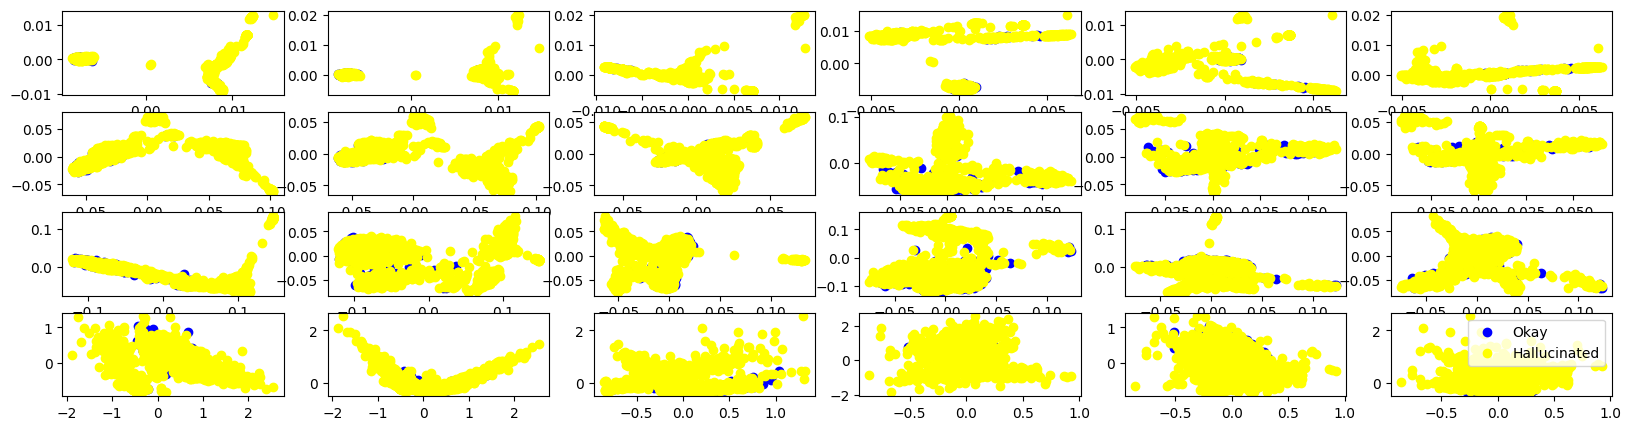

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

chosen_dims = {}
# fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 5))
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 5))
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 5),subplot_kw=dict(projection='3d'))
for i,layer in enumerate([0,11,22,31]): #([0,11,22,31])
    layer_mlp_wise_activations = np.squeeze(mlp_wise_activations[:,layer,:])
    # # # layer_mlp_wise_activations = (layer_mlp_wise_activations - layer_mlp_wise_activations.min())/(layer_mlp_wise_activations.max() - layer_mlp_wise_activations.min()) # is it okay to normalise across all dimensions?
    # truth_activations = np.vstack([layer_mlp_wise_activations[i,:] for i,label in enumerate(labels) if label==1])
    # false_activations = np.vstack([layer_mlp_wise_activations[i,:] for i,label in enumerate(labels) if label==0])
    # # print(layer,'Var:',np.var(truth_activations),np.var(false_activations))
    # # print(layer,'Angle:',angle_between(np.mean(truth_activations,axis=0),np.mean(false_activations,axis=0)))
    # act_diff = (np.max(truth_activations,axis=0)-np.max(false_activations,axis=0))/np.max(truth_activations,axis=0)
    # counts, bins = np.histogram(act_diff)
    # # axes[i].stairs(counts, bins)
    # # print(len(np.argwhere(act_diff > 0.3)))
    # chosen_dims[layer] = np.argwhere(act_diff > 0.3)

    pca = KernelPCA(n_components=4, kernel='poly') # PCA(n_components=3)
    transformed = pd.DataFrame(pca.fit_transform(layer_mlp_wise_activations))
    axes[i,0].scatter(transformed[np.array(labels)==1][0], transformed[np.array(labels)==1][1], label='Okay', c='blue')
    axes[i,0].scatter(transformed[np.array(labels)==0][0], transformed[np.array(labels)==0][1], label='Hallucinated', c='yellow')
    axes[i,1].scatter(transformed[np.array(labels)==1][0], transformed[np.array(labels)==1][2], label='Okay', c='blue')
    axes[i,1].scatter(transformed[np.array(labels)==0][0], transformed[np.array(labels)==0][2], label='Hallucinated', c='yellow')
    axes[i,2].scatter(transformed[np.array(labels)==1][1], transformed[np.array(labels)==1][2], label='Okay', c='blue')
    axes[i,2].scatter(transformed[np.array(labels)==0][1], transformed[np.array(labels)==0][2], label='Hallucinated', c='yellow')
    axes[i,3].scatter(transformed[np.array(labels)==1][3], transformed[np.array(labels)==1][0], label='Okay', c='blue')
    axes[i,3].scatter(transformed[np.array(labels)==0][3], transformed[np.array(labels)==0][0], label='Hallucinated', c='yellow')
    axes[i,4].scatter(transformed[np.array(labels)==1][3], transformed[np.array(labels)==1][1], label='Okay', c='blue')
    axes[i,4].scatter(transformed[np.array(labels)==0][3], transformed[np.array(labels)==0][1], label='Hallucinated', c='yellow')
    axes[i,5].scatter(transformed[np.array(labels)==1][3], transformed[np.array(labels)==1][2], label='Okay', c='blue')
    axes[i,5].scatter(transformed[np.array(labels)==0][3], transformed[np.array(labels)==0][2], label='Hallucinated', c='yellow')
    # # # 3d
    # # axes[i].scatter(transformed[labels==1][0], transformed[labels==1][1], transformed[labels==1][2], label='Truthful', c='blue')
    # # axes[i].scatter(transformed[labels==0][0], transformed[labels==0][1], transformed[labels==0][2], label='Non-truthful', c='yellow')
plt.legend()
plt.show()

In [ ]:
labels[:2]

[1, 0]

In [ ]:
for layer in [0,11,22,31]
    mlp_wise_activations[0,layer,:]